In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from scipy.sparse import hstack
from sklearn.preprocessing import Normalizer ,OneHotEncoder

In [2]:
df=pd.read_csv('auto_clean.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [5]:
df.select_dtypes(include='number').head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [6]:
df.select_dtypes(exclude='number').head()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
0,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
1,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium
3,audi,std,four,sedan,fwd,front,ohc,four,mpfi,Medium
4,audi,std,four,sedan,4wd,front,ohc,five,mpfi,Medium


# losss

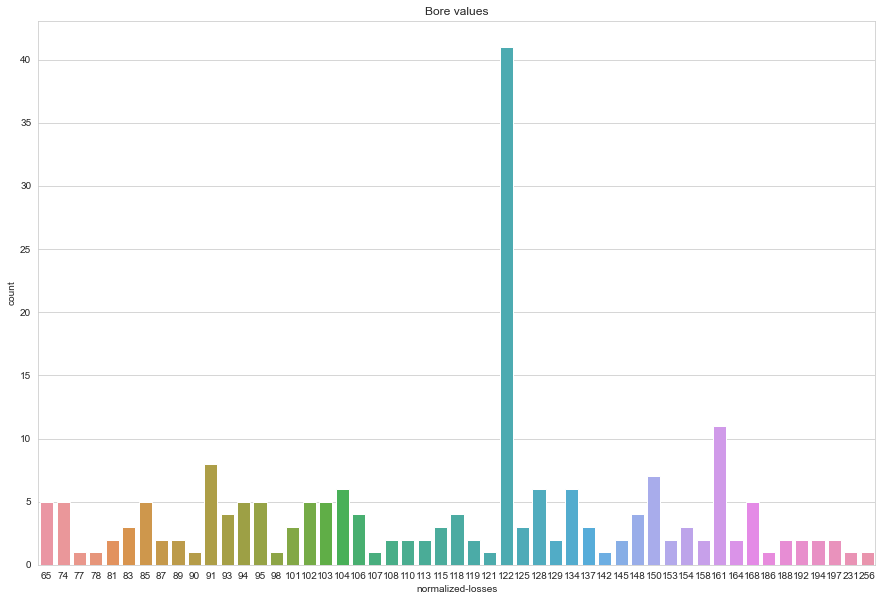

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(df['normalized-losses'])
plt.title('Bore values')
plt.show()

In [8]:
def return_number(value):
    if '?' in value:
        return 0
    else:
        return float (value)


# Describe

In [9]:
df['normalized-losses'].describe()

count    201.00000
mean     122.00000
std       31.99625
min       65.00000
25%      101.00000
50%      122.00000
75%      137.00000
max      256.00000
Name: normalized-losses, dtype: float64

# Distributon

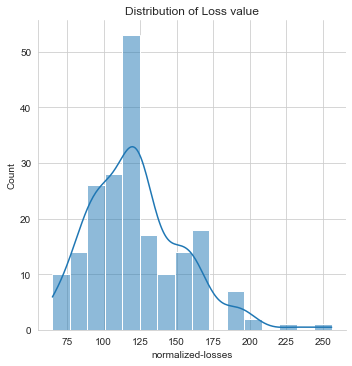

In [10]:
sns.displot(df['normalized-losses'],kde= True)
plt.title('Distribution of Loss value')
plt.show()

# outliers handlening

In [11]:
df['normalized-losses']=df['normalized-losses'].apply(lambda x:df['normalized-losses'].median() if (x>170) else x)

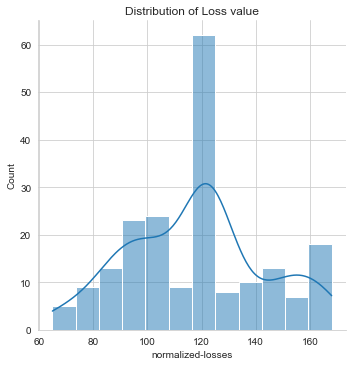

In [12]:
sns.displot(df['normalized-losses'],kde= True)
plt.title('Distribution of Loss value')
plt.show()


# bore

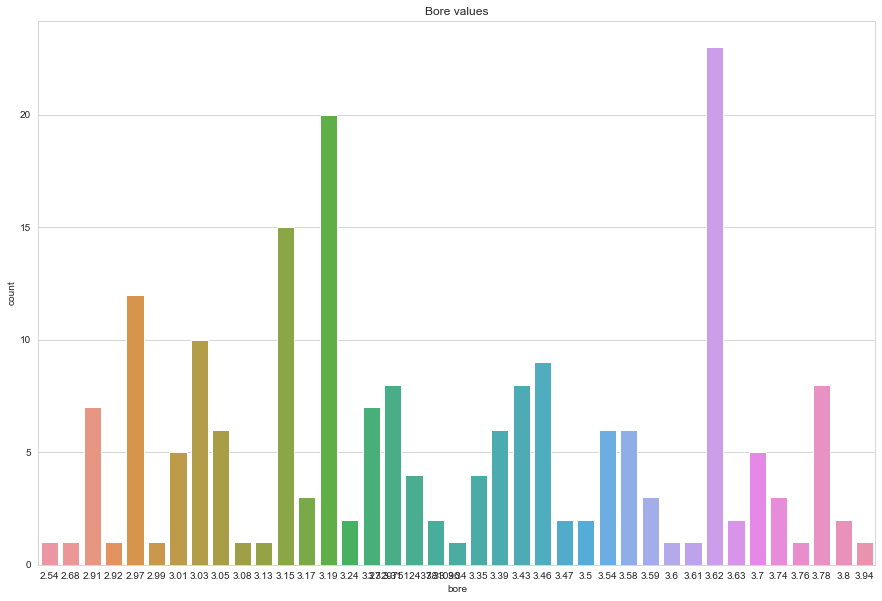

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(df['bore'])
plt.title('Bore values')
plt.show()

In [14]:
df['bore'].describe()


count    201.000000
mean       3.330692
std        0.268072
min        2.540000
25%        3.150000
50%        3.310000
75%        3.580000
max        3.940000
Name: bore, dtype: float64

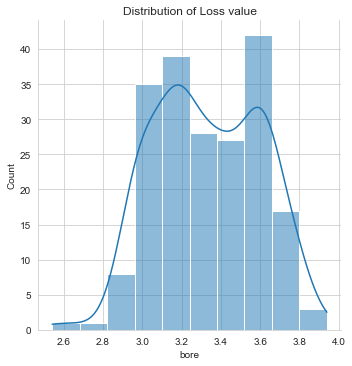

In [15]:
sns.displot(df.bore,kde= True)
plt.title('Distribution of Loss value')
plt.show()

# outlers handling

In [16]:
df['bore']=df['bore'].apply(lambda x:df['bore'].median() if (x==0) else x)

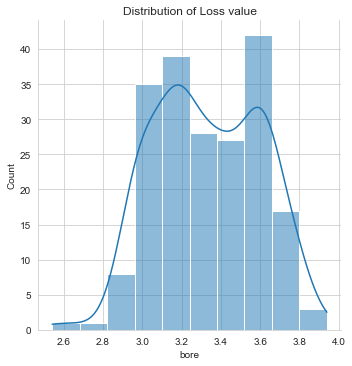

In [17]:
sns.displot(df.bore,kde= True)
plt.title('Distribution of Loss value')
plt.show()

# stroke

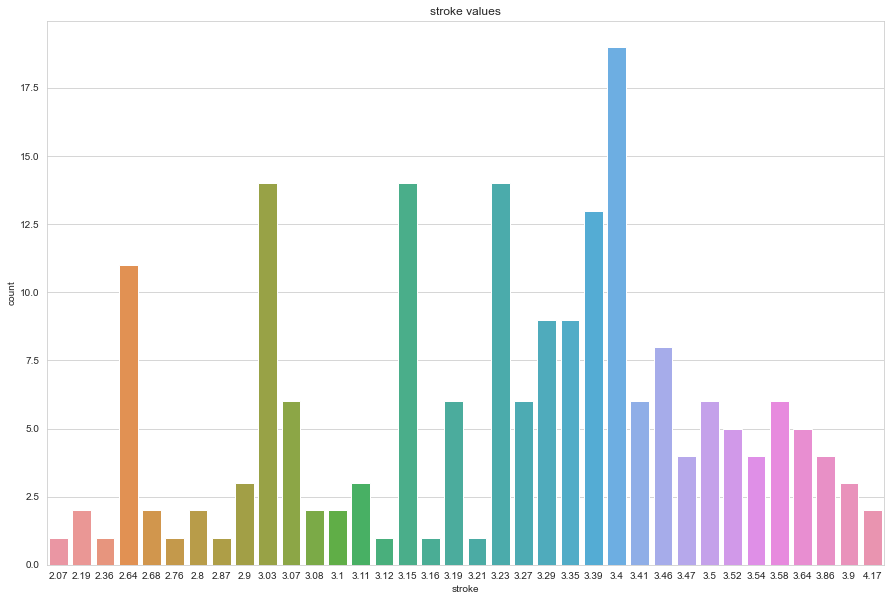

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(df['stroke'])
plt.title('stroke values')
plt.show()

In [19]:
df['stroke'].describe()


count    197.000000
mean       3.256904
std        0.319256
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

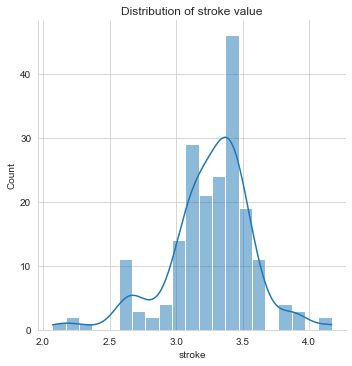

In [20]:
sns.displot(df.stroke,kde= True)
plt.title('Distribution of stroke value')
plt.show()

# outliers handling

In [21]:
df['stroke']=df['stroke'].apply(lambda x:df['stroke'].median() if (x<2.50) else x)

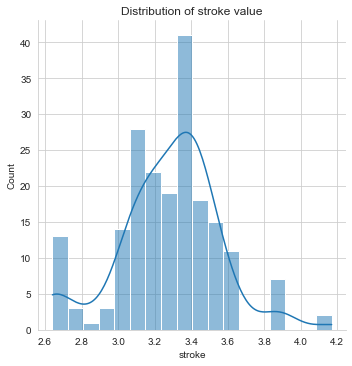

In [22]:
sns.displot(df.stroke,kde= True)
plt.title('Distribution of stroke value')
plt.show()

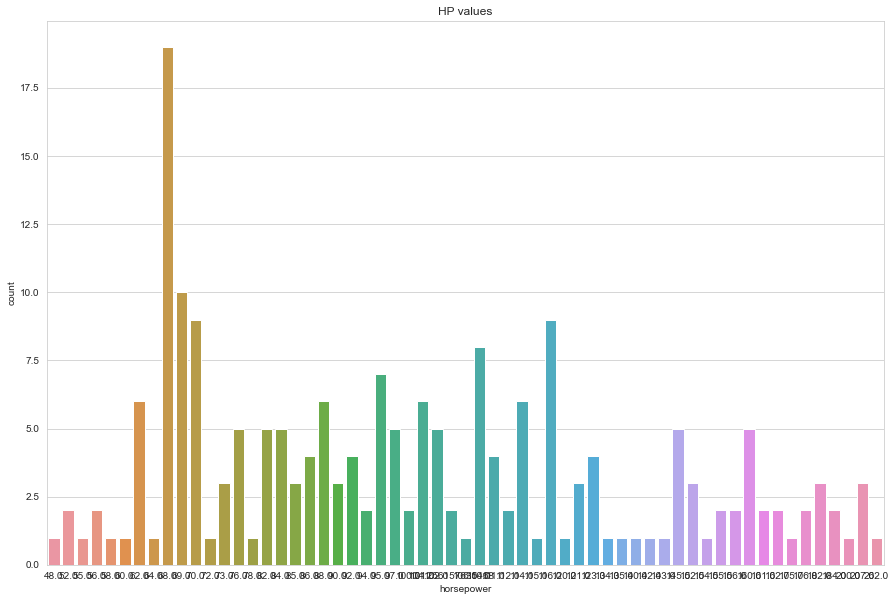

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(df['horsepower'])
plt.title('HP values')
plt.show()

In [24]:
df['horsepower'].describe()

count    201.000000
mean     103.405534
std       37.365700
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

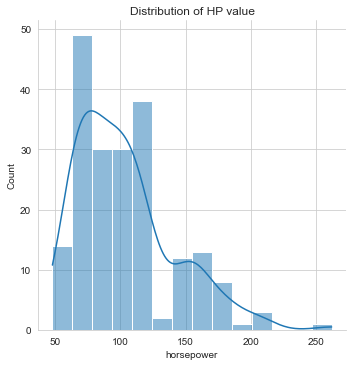

In [25]:
sns.displot(df.horsepower,kde= True)
plt.title('Distribution of HP value')
plt.show()

# handling Outliers

In [26]:
df['horsepower']=df['horsepower'].apply(lambda x:df['horsepower'].median() if (x==0 or x>250) else x)

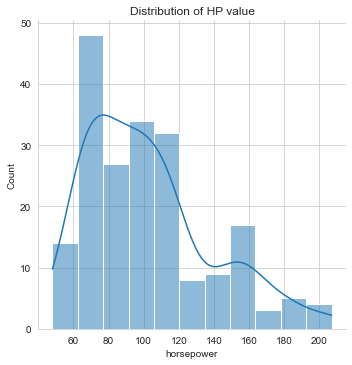

In [27]:
sns.displot(df.horsepower,kde= True)
plt.title('Distribution of HP value')
plt.show()

# Peak RPM

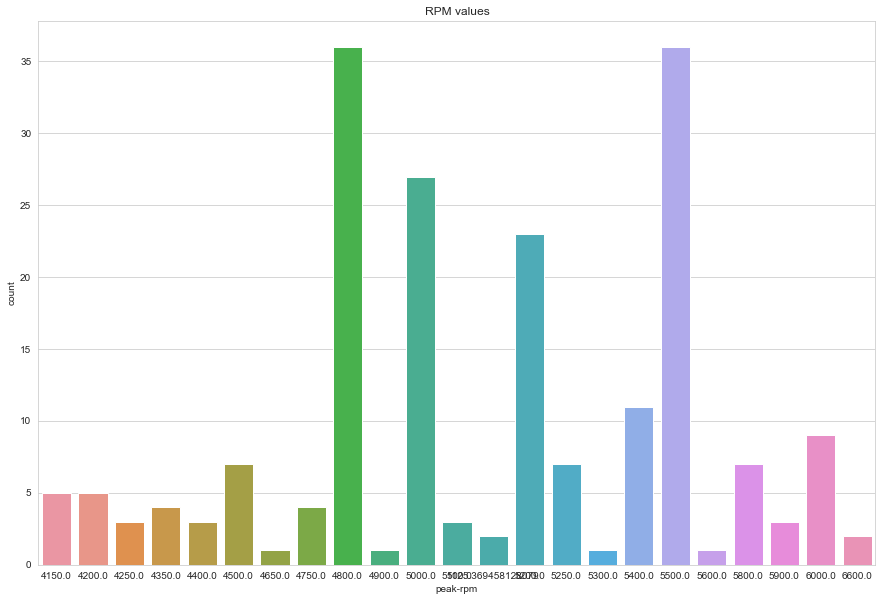

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(df['peak-rpm'])
plt.title('RPM values')
plt.show()

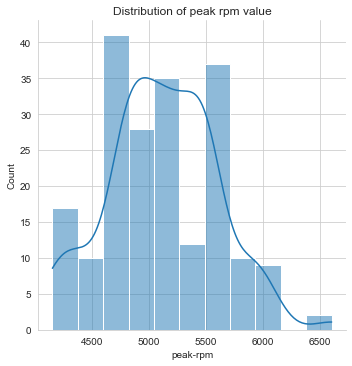

In [29]:
sns.displot(df['peak-rpm'],kde= True)
plt.title('Distribution of peak rpm value')
plt.show()

In [30]:
#handling outlires

In [31]:
df['peak-rpm']=df['peak-rpm'].apply(lambda x:df['peak-rpm'].median() if (x>6300) else x)

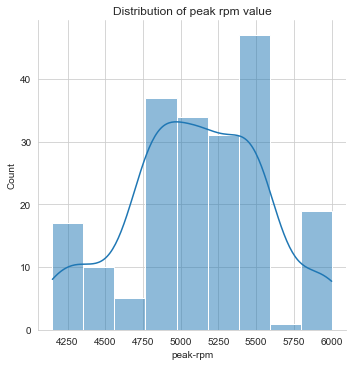

In [32]:
sns.displot(df['peak-rpm'],kde= True)
plt.title('Distribution of peak rpm value')
plt.show()

In [33]:
df['price'].value_counts()


8921.0     2
18150.0    2
8845.0     2
8495.0     2
7609.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 186, dtype: int64

In [34]:
df['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

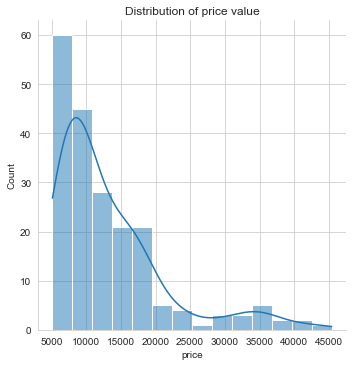

In [35]:
sns.displot(df['price'],kde= True)
plt.title('Distribution of price value')
plt.show()

In [36]:
df.select_dtypes(include='number').head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122.0,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122.0,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122.0,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164.0,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164.0,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [37]:
df.select_dtypes(exclude='number').head()

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
0,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
1,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium
3,audi,std,four,sedan,fwd,front,ohc,four,mpfi,Medium
4,audi,std,four,sedan,4wd,front,ohc,five,mpfi,Medium


# Analysis Nuemerical value

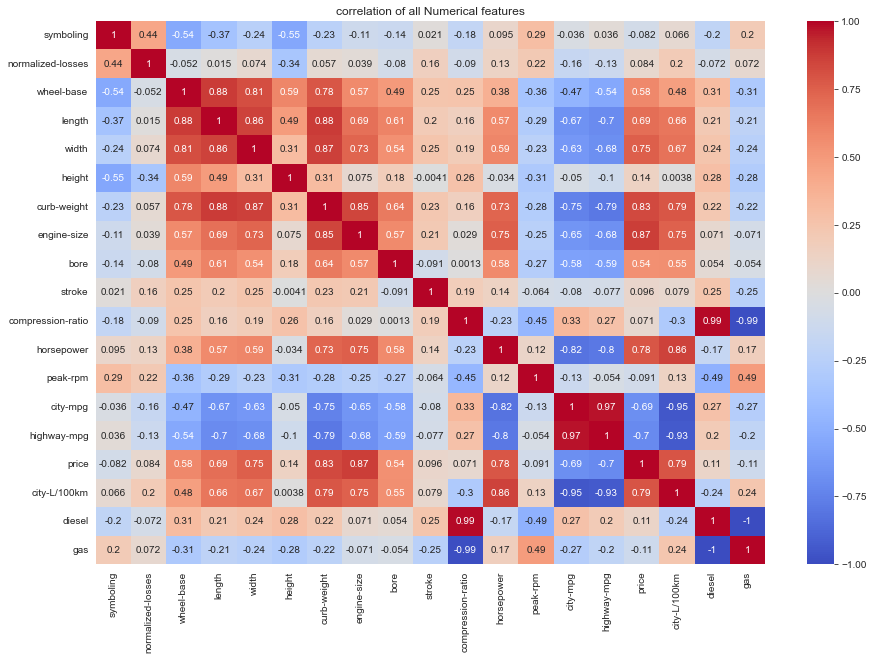

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr() ,annot= True, cmap='coolwarm')
plt.title('correlation of all Numerical features')
plt.show()

# Analysing Categoriale

In [39]:
df.select_dtypes(exclude='number')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
0,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
1,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium
3,audi,std,four,sedan,fwd,front,ohc,four,mpfi,Medium
4,audi,std,four,sedan,4wd,front,ohc,five,mpfi,Medium
...,...,...,...,...,...,...,...,...,...,...
196,volvo,std,four,sedan,rwd,front,ohc,four,mpfi,Medium
197,volvo,turbo,four,sedan,rwd,front,ohc,four,mpfi,High
198,volvo,std,four,sedan,rwd,front,ohcv,six,mpfi,Medium
199,volvo,turbo,four,sedan,rwd,front,ohc,six,idi,Medium


In [40]:
cat_columns=df.select_dtypes(exclude='number').columns

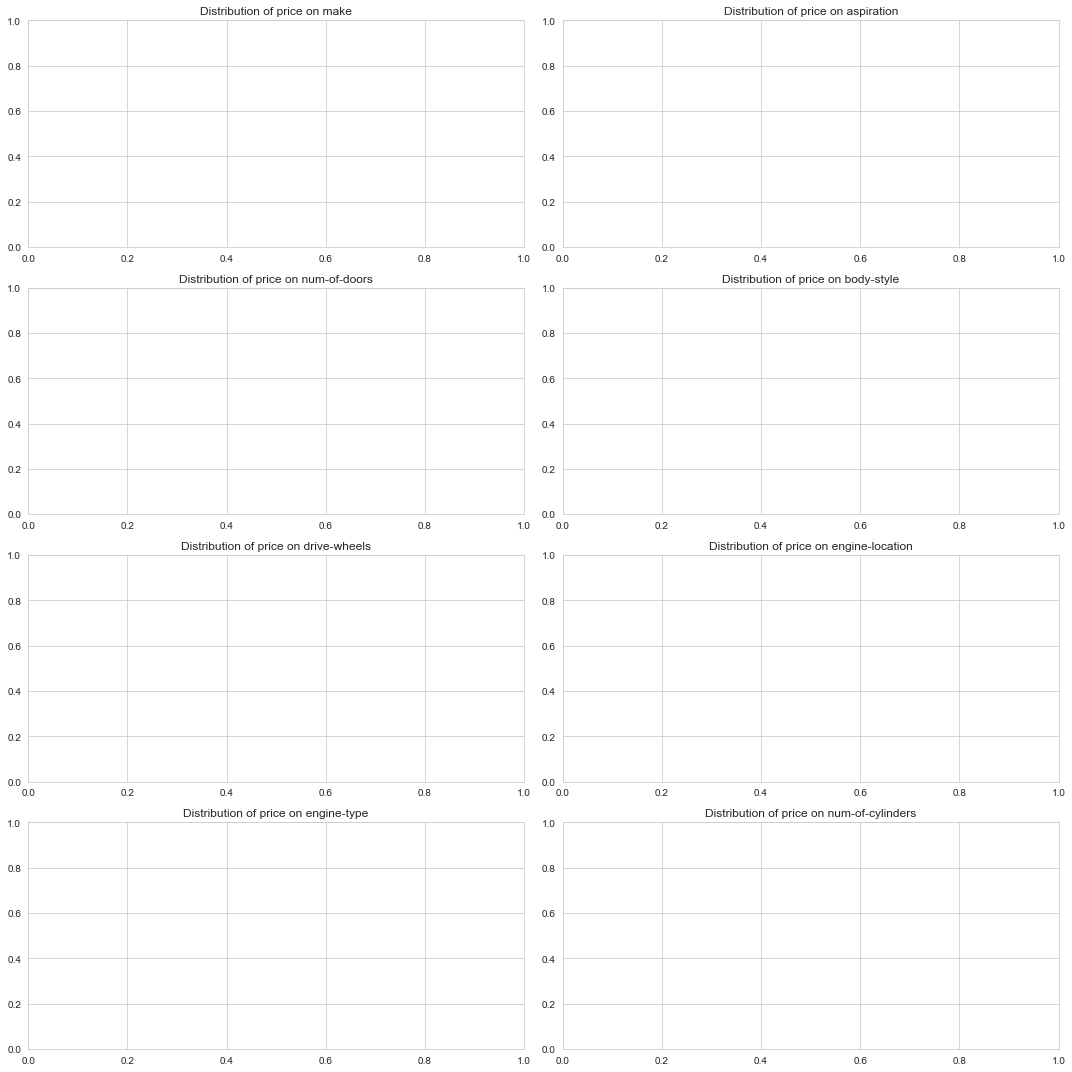

In [41]:
fig, axes =plt.subplots(4,2)
fig.set_figheight(15)
fig.set_figwidth(15)


for ax ,col in zip ( axes.flatten(),cat_columns):
    #sns.kdeplot(ax=ax,df=df, x ='Price',hue=col)
    ax.set_title("Distribution of price on "+str(col))
    plt.tight_layout()

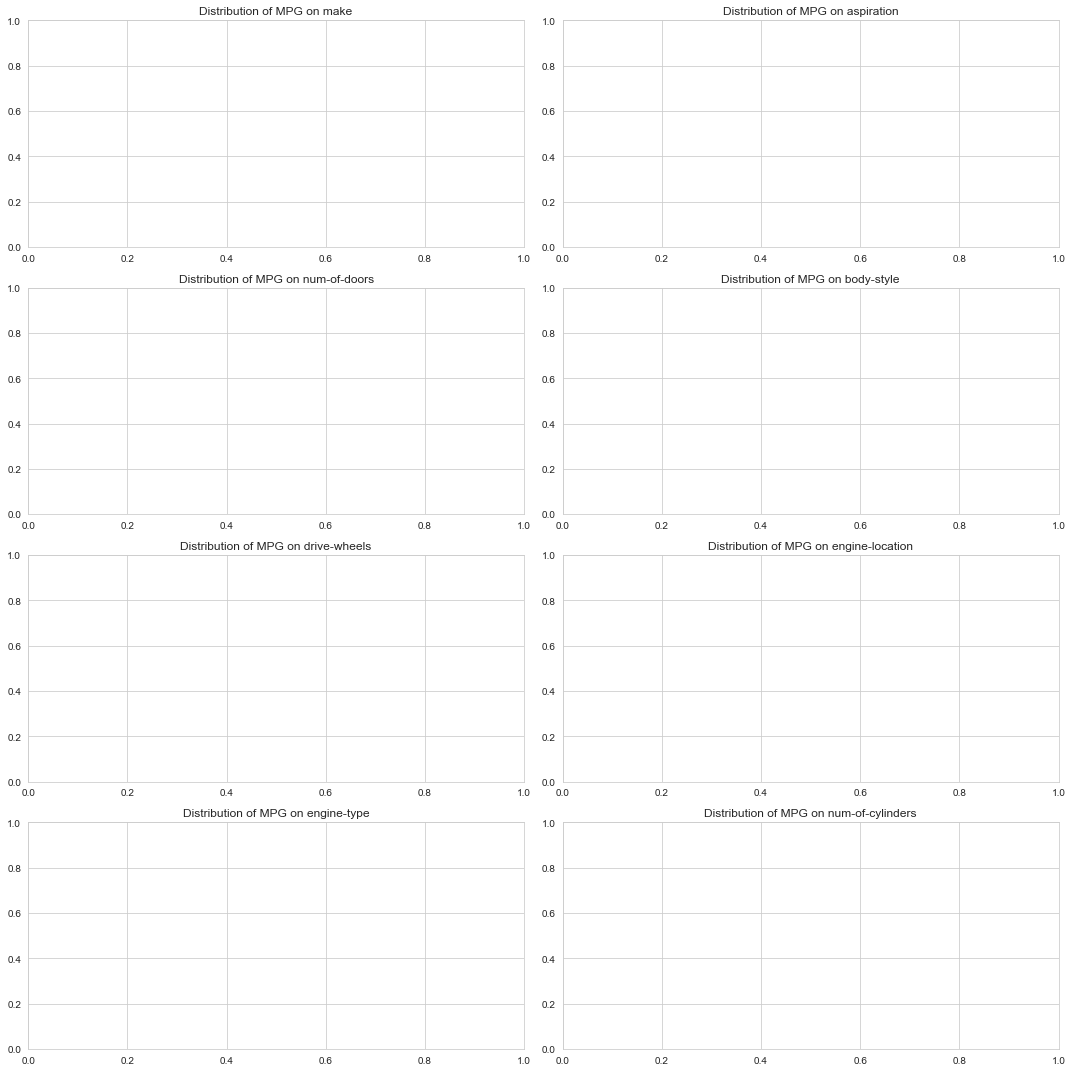

In [43]:
fig, axes =plt.subplots(4,2)
fig.set_figheight(15)
fig.set_figwidth(15)


for ax ,col in zip ( axes.flatten(),cat_columns):
    #sns.kdeplot(ax=ax,df=df, x=' highway-mpg',hue=col)
    ax.set_title("Distribution of MPG on "+str(col))
    plt.tight_layout()